In [1]:
%load_ext autoreload
%autoreload 2

## 1.2 Dataset

In [12]:
from dataset import RAHWhisperDataset, RAHWhisperTokenizer, RIRAug, NoiseAug
from matplotlib import pyplot as plt
from IPython.display import Audio

In [13]:
t = RAHWhisperTokenizer(path='fechas1/fechas1_train.csv')
dataset=RAHWhisperDataset('fechas1/fechas1_train.csv', t)
rir_dataset=RAHWhisperDataset('fechas1/fechas1_train.csv', t, transform=[RIRAug(prob=1)])
noise_dataset=RAHWhisperDataset('fechas1/fechas1_train.csv', t, transform=[NoiseAug(prob=1)])

In [14]:
def plot_spectrogram(data, fs):
    # Plot the spectrogram
    plt.figure(figsize=(10, 5))
    plt.specgram(data, Fs=fs, cmap='viridis')
    plt.colorbar(label='Intensity (dB)')
    plt.title("Spectrogram")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

## Datos no aumentados
- Espectograma muy diferenciable con la voz
- Sonido claro

/home/diego/.cache/pypoetry/virtualenvs/rahwisper-qWUPAEuw-py3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


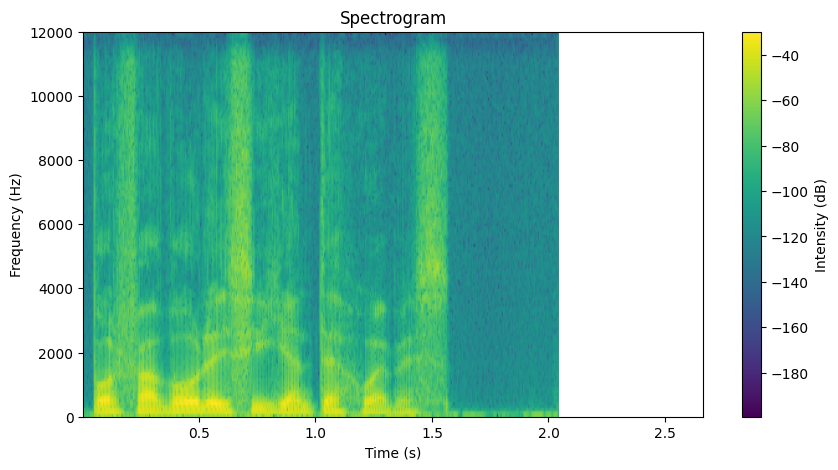

In [15]:
data=dataset.get_all_info(0)

plot_spectrogram(data[2], data[3])
Audio(data[2], rate=data[3])

## Datos aumentados con RIR
- Espectograma mas largo y los sonidos no tan diferenciables
- Sonido claro pero mas lejano

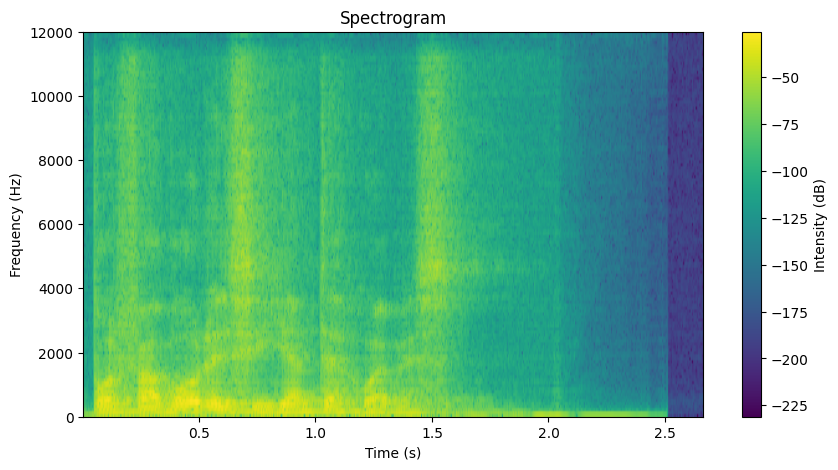

In [16]:
rir_data=rir_dataset.get_all_info(0)
plot_spectrogram(rir_data[2], rir_data[3])
Audio(rir_data[2], rate=rir_data[3])

## Datos aumentados con ruído
- Espectograma no diferenciable
- Se oye claramente el sonido de aumento

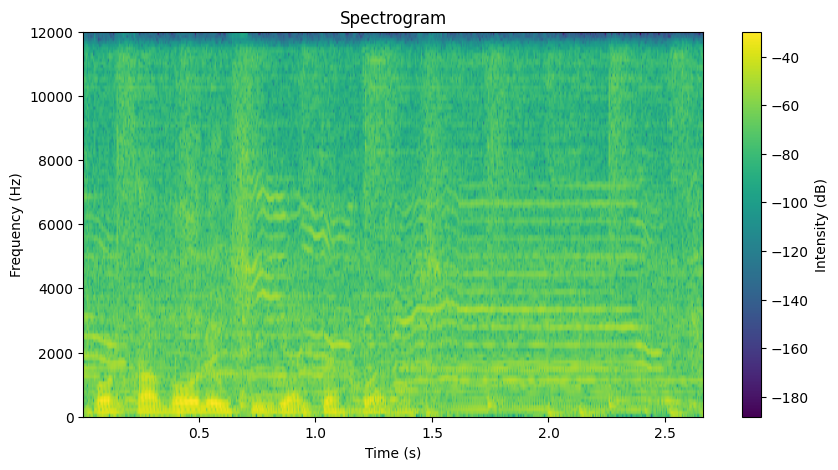

In [17]:
noise_data=noise_dataset.get_all_info(0)
plot_spectrogram(noise_data[2], noise_data[3])
Audio(noise_data[2], rate=noise_data[3])